# HW03 <font color=red>(제출기한-4월23일자정)</font>
Matplotlib 연습을 위한 문제입니다. 
- 반드시 수업시간 배운 내용만을 사용하여 코드를 작성합니다. 
- 한 셀에 여러줄의 코드를 사용해도 무방합니다.

제출시 다음 사항에 유의하기 바랍니다.
- 텍스트 셀에 설명되어 있는 각 문항을 잘 읽은 뒤, 코드 셀에 적절한 코드를 작성합니다.
- 작성 후 파일명에 ``학번``을 자신의 학번으로 고친 후 ULMS 해당과제 제출란에 업로드합니다.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

다음은 100명 학생에 관한 정보를 담고 있는 변수들이다. 
 - years : 학년 (1~4)
 - gender : 성별 ('female', 'male')
 - height : 키
 - weight : 몸무게
 
아래 코드는 수정없이 사용하면 된다.

In [0]:
rng=np.random.RandomState(0)
years=rng.randint(1, 5, size=100)
gender=['female']*50 + ['male']*50
height=np.concatenate([rng.randn(50)*4+160, rng.randn(50)*7+170]) 
weight=np.concatenate([rng.randn(50)*4+60, rng.randn(50)*7+70]) 

### 문제1
heigth(x축)와 weight(y축) 사이의 산점도를 그리시오. 

(단, marker는 'o' 사용)

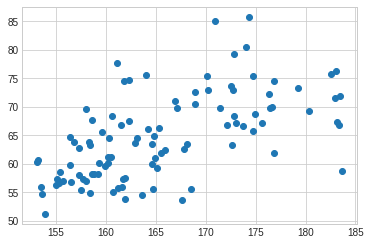

In [0]:
### 답안을 작성하시오. 
#plt.scatter(height, weight, marker='o')
plt.plot(height, weight, 'o')

### 문제2
처음 50명이 'female', 나머지 50명이 'male' 데이터이므로 이를 서로 다른 종류로 구분하여 산점도를 그리시오. 

단,  
- legend를 오른쪽아래 테두리 있는 형태로 추가
- marker는 'o'(female), 's'(male) 사용
- x축과 y축 label을 'height', 'weight'로 표시

Text(0, 0.5, 'weight')

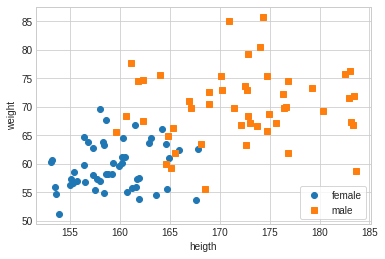

In [0]:
### 답안을 작성하시오. 
plt.plot(height[:50], weight[:50], 'o', label='female')
plt.plot(height[50:], weight[50:], 's', label='male')
plt.legend(loc='lower right', frameon=True)
plt.xlabel('heigth')
plt.ylabel('weight')

### 문제3
이번에는 ``years`` 변수 내용을 이용하여 학년별 산점도를 그리시오.

단,  
- legend를 왼쪽위 테두리 있는 형태로 추가하고 Year1, Year2, Year3, Year4로 label 부여
- marker는 'o'(Year1), 's'(Year2), 'd'(Year3), '+'(Year4) 사용
- x축과 y축 label을 'height', 'weight'로 표시

Text(0, 0.5, 'weight')

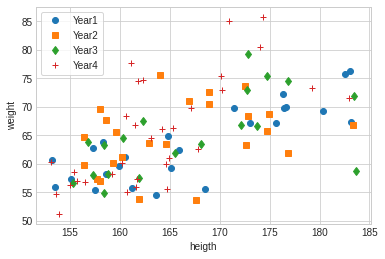

In [0]:
### 답안을 작성하시오. 
markers=['o','s','d','+']
for i in np.arange(1,5):
  plt.plot(height[years==i], weight[years==i], markers[i-1], label='Year'+str(i))
plt.legend(loc='upper left', frameon=True) 
plt.xlabel('heigth')
plt.ylabel('weight')

### 문제4
학년별 height의 평균(mean)과 표준편차(std)를 이용하여 errorbar를 그리시오. 

단,
- errorbar 속성은 수업시간에 배운 fmt='-k' 사용
- x축과 y축 label을 'year', 'height'로 표시
- x축 범위는 0부터 5까지로 설정

Text(0, 0.5, 'height')

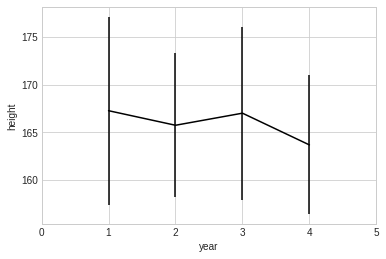

In [0]:
### 답안을 작성하시오. 
df=pd.DataFrame({'years':years,'gender':gender, 'height':height, 'weight':weight})
mean_hw = df.groupby('years').mean()
std_hw = df.groupby('years').std()
plt.errorbar(np.arange(1,5), mean_hw['height'], yerr=std_hw['height'], fmt='-k')
plt.xlim(left=0, right=5)
plt.xlabel('year')
plt.ylabel('height')

### 문제5
학년별 height와 weight의 histogram을 다음 조건에 맞게 그리시오. 
- 4행 2열의 subplot을 생성하여 각 행은 year를 뜻하고, 1번 및 2번 열은 각각 height와 weight 결과를 뜻한다.
- 모든 histogram에서 bin의 개수는 10이다.
- 전체 그림의 크기는 [6.4, 6.4]이다.
- subplot 사이의 공백은 hspace=0.4, wspace=0.4이다.


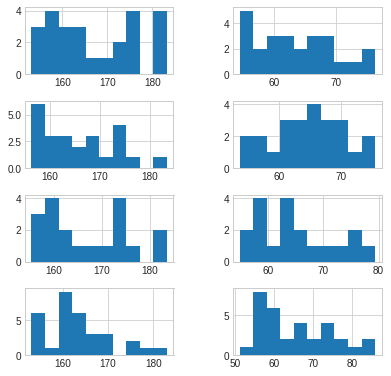

In [0]:
### 답안을 작성하시오. 
plt.figure(figsize=[6.4, 6.4])
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 5):
  plt.subplot(4,2,2*i-1)
  d=height[years == i]
  plt.hist(d,bins=10)

  plt.subplot(4,2,2*i)
  d=weight[years == i]
  plt.hist(d,bins=10)
